<a href="https://colab.research.google.com/github/aviraljoshi23/Bank_Loan_Predicton/blob/main/LoanPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings. filterwarnings("ignore")

In [62]:
from google.colab import files
uploaded = files.upload()

Saving sample_submission_49d68Cx.csv to sample_submission_49d68Cx (1).csv
Saving test_lAUu6dG.csv to test_lAUu6dG (1).csv
Saving train_ctrUa4K.csv to train_ctrUa4K (1).csv


In [63]:
train = pd.read_csv('train_ctrUa4K.csv') 
test = pd.read_csv('test_lAUu6dG.csv')


In [64]:
train_orignal=train.copy()#i'am copying the orignal data into another variable
test_orignal=test.copy()


In [65]:
print(train.columns,'\n')
print(test.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object') 

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')


In [66]:
train.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [67]:
test.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [68]:
train['Dependents'].replace('3+',3,inplace=True)
test['Dependents'].replace('3+',3,inplace=True)
train.head(15)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [69]:
test.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban


In [70]:
print(train.dtypes)

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object


In [71]:
print(test.dtypes)

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object


In [72]:
train.shape

(614, 13)

In [73]:
test.shape

(367, 12)

Here i demonstrate the actual shape of train and test data


#Univariate Analysis
It is one of the most simple way to analysis the every single variable individually

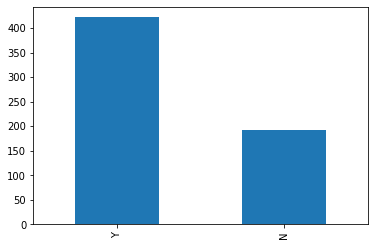

In [74]:
train['Loan_Status'].value_counts(normalize=True)
train['Loan_Status'].value_counts().plot.bar()

As you can notice that no. Y are more than 400 and N are about 190 somthing


In [75]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

There is a actaul subvalue of Y and N

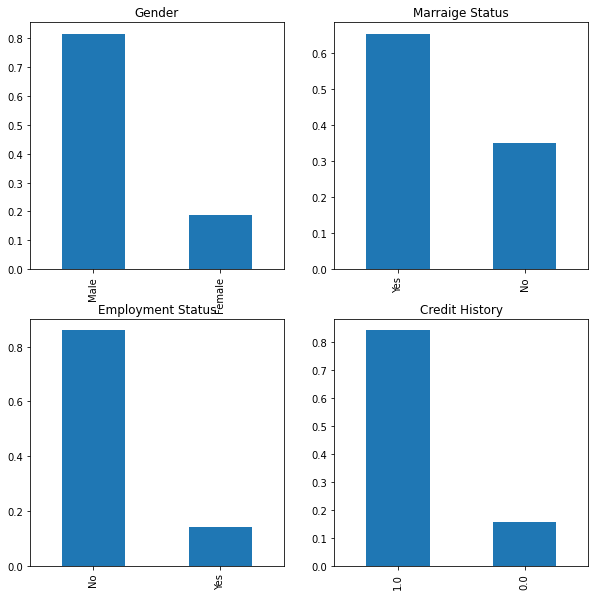

In [76]:
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(10,10),title="Gender")
plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(figsize=(10,10),title="Marraige Status")
plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(10,10),title="Employment Status")
plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(figsize=(10,10),title="Credit History")
plt.show()


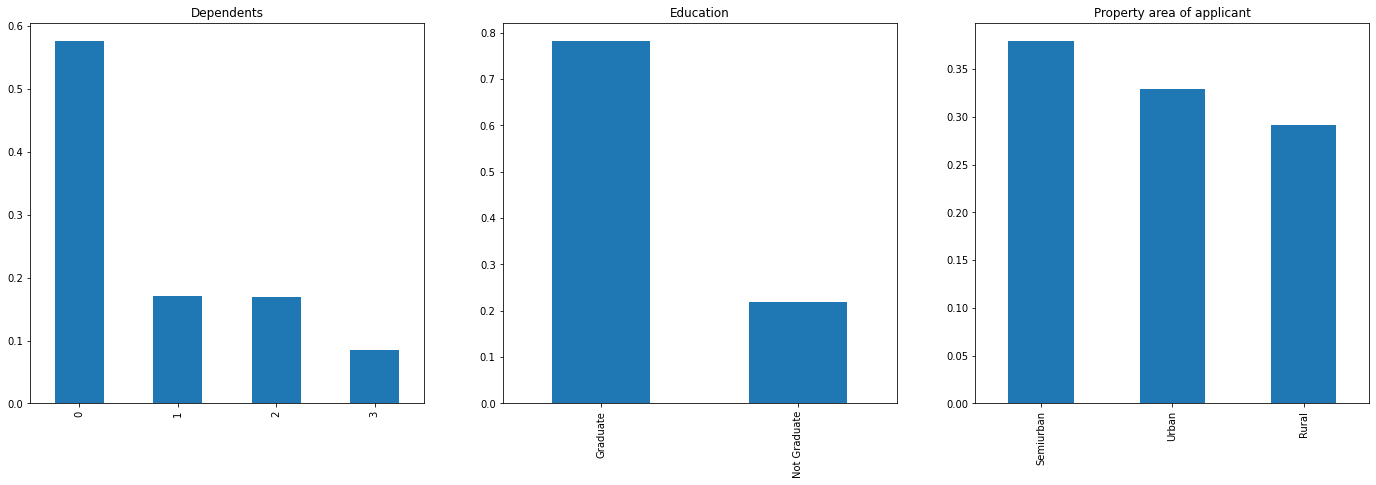

In [77]:
plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,7),title='Dependents')
plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(figsize=(24,7),title='Education')
plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(figsize=(24,7),title='Property area of applicant')
plt.show()

Here i have used only independent variable to plot the graph

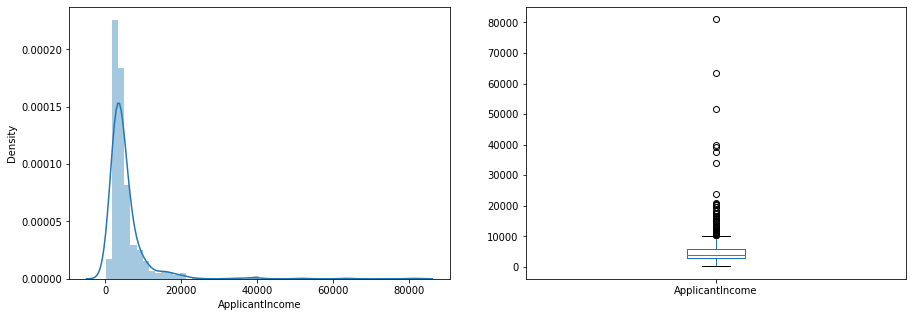

In [78]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome'])
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(15,5))

Text(0.5, 0.98, ' ')

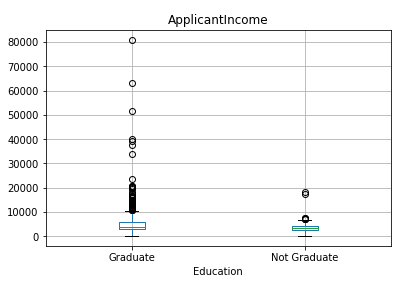

In [79]:
train.boxplot(column='ApplicantIncome',by='Education')
plt.suptitle(" ")


Few outliers are there as number of higer income people's are more 

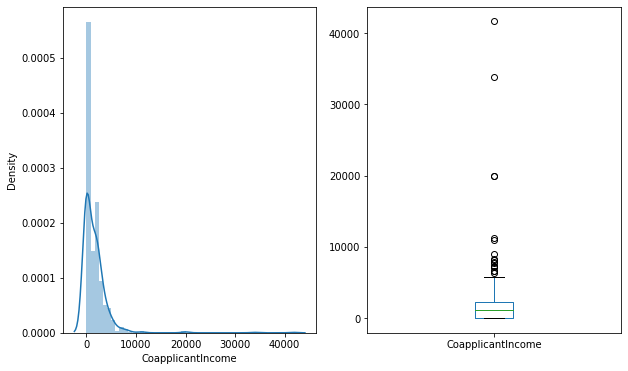

In [80]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])
plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(10,6))
plt.show()

Coapplicant Income doesn't looks normaly distributed

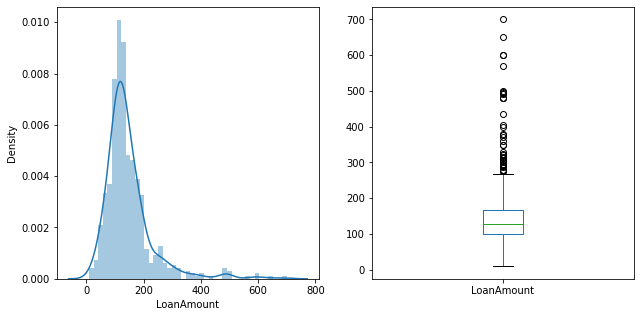

In [81]:
plt.figure(1)
plt.subplot(131)
df=train.dropna()
sns.distplot(train['LoanAmount'])
#boxplot for  loan amount
plt.subplot(132)
train['LoanAmount'].plot.box(figsize=(16,5))

#Bivariate Analysis
Now i will check the relationship between target variable and categorical variable

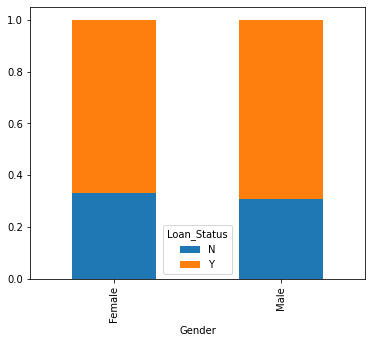

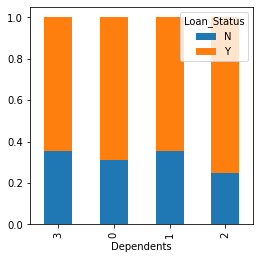

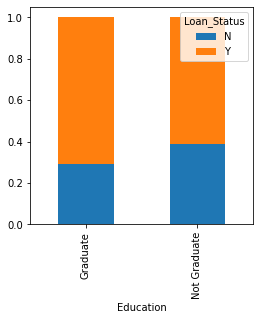

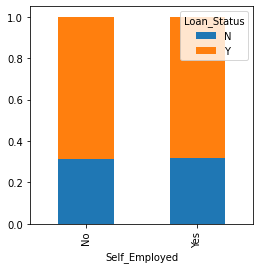

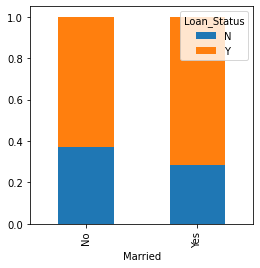

In [82]:
gender=pd.crosstab(train['Gender'],train['Loan_Status'])
dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
education=pd.crosstab(train['Education'],train['Loan_Status'])
self_employe=pd.crosstab(train['Self_Employed'],train['Loan_Status'])
married=pd.crosstab(train['Married'],train['Loan_Status'])
gender.div(gender.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(6,5))
dependents.div(dependents.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
education.div(education.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
self_employe.div(self_employe.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
married.div(married.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

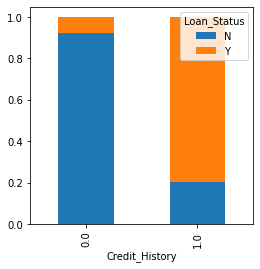

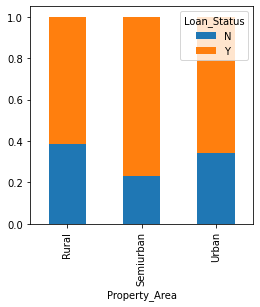

In [83]:
credit_history=pd.crosstab(train['Credit_History'],train['Loan_Status'])
credit_history.div(credit_history.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
property_area=pd.crosstab(train['Property_Area'],train['Loan_Status'])
property_area.div(property_area.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

*People with credit history one are more likely to get loan approved


*And people from semiurban area are possibly gettting loan approved 

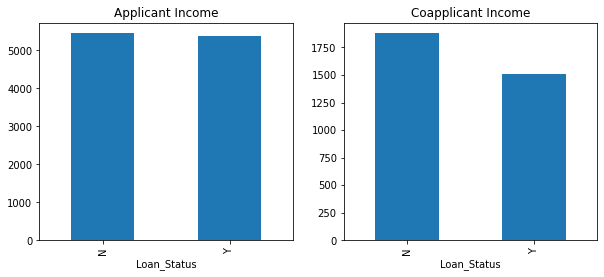

In [84]:
plt.figure(1)
plt.subplot(121)
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar(title='Applicant Income')
plt.subplot(122)
train.groupby('Loan_Status')['CoapplicantIncome'].mean().plot.bar(figsize=(10,4),title='Coapplicant Income')
plt.show()

In applicant income i dont see any changes in mean  income,so create bins.

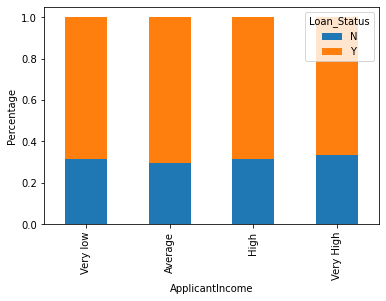

In [85]:
Bins_Income=[0,2500,4000,6000,50000]
group=['Very low','Average','High','Very High']
train['Income_Bins']=pd.cut(train['ApplicantIncome'],Bins_Income,labels=group)
Income_Bins=pd.crosstab(train['Income_Bins'],train['Loan_Status'])
Income_Bins.div(Income_Bins.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('ApplicantIncome')
p=plt.ylabel('Percentage')

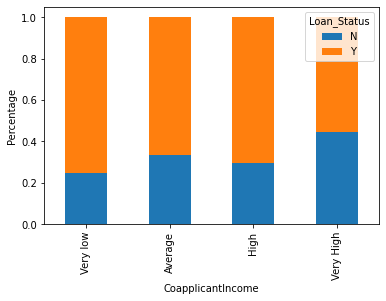

In [86]:
Bins_Income=[0,2500,4000,6000,50000]
group=['Very low','Average','High','Very High']
train['Co_Income_Bins']=pd.cut(train['CoapplicantIncome'],Bins_Income,labels=group)
Income_Bins=pd.crosstab(train['Co_Income_Bins'],train['Loan_Status'])
Income_Bins.div(Income_Bins.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('CoapplicantIncome')
p=plt.ylabel('Percentage')

Now here i have just combine the applicant income and coapplicant income to check overall loan approval

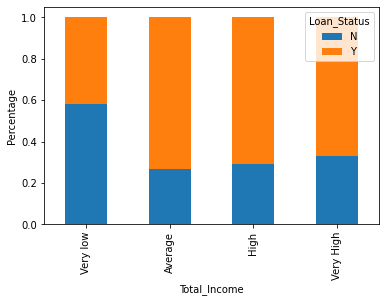

In [87]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
Bins=[0,2500,4000,6000,81000]
group=['Very low','Average','High','Very High']
train['Total_Income_bin']=pd.cut(train['Total_Income'],Bins,labels=group)
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('Total_Income')
p=plt.ylabel('Percentage')

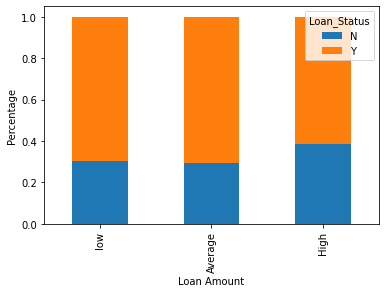

In [88]:
Bins=[0,100,250,800]
group=['low','Average','High']
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],Bins,labels=group)
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('Loan Amount')
p=plt.ylabel('Percentage')

In [89]:
train=train.drop(['Income_Bins','LoanAmount_bin','Total_Income_bin','Co_Income_Bins','Total_Income'],axis=1)

In [90]:
train['Loan_Status'].replace('Y',1,inplace=True)
train['Loan_Status'].replace('N',0,inplace=True)

In [91]:
train.head(7)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,1


I have drop all the bins from training dataset, as well i have change all the loan status value in 1 or 0 from Y and N

#Correlation 

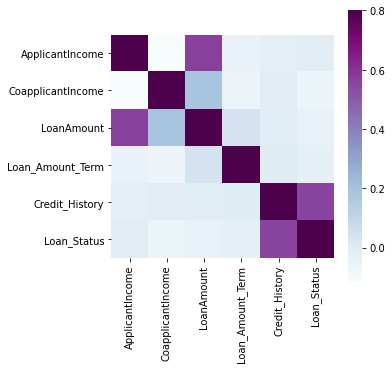

In [92]:
matrix=train.corr()
ax=plt.subplots(figsize=(5,5))
sns.heatmap(matrix,vmax=.8,square=True,cmap='BuPu')

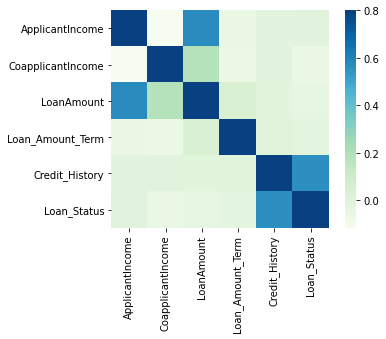

In [93]:
sns.heatmap(matrix,vmax=.8,square=True,cmap='GnBu')

Here i have plotted two correlation plots to show the prorper correlation between variable. Dark area means the variable having good correlation.

In [94]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Outlier Treatment 

In [95]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].mode()[0],inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)

In [96]:
train['Loan_Amount_Term'].value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [97]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)

In [98]:
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

In [99]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [100]:
test['Gender'].fillna(test['Gender'].mode()[0],inplace=True)
test['Married'].fillna(test['Married'].mode()[0],inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0],inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0],inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].mode()[0],inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0],inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0],inplace=True)

In [101]:
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0],inplace=True)

In [102]:
test['LoanAmount'].fillna(test['LoanAmount'].median(),inplace=True)

In [103]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [104]:
test.shape

(367, 12)

Applying Log Techinique to get data normally distributed on train data 

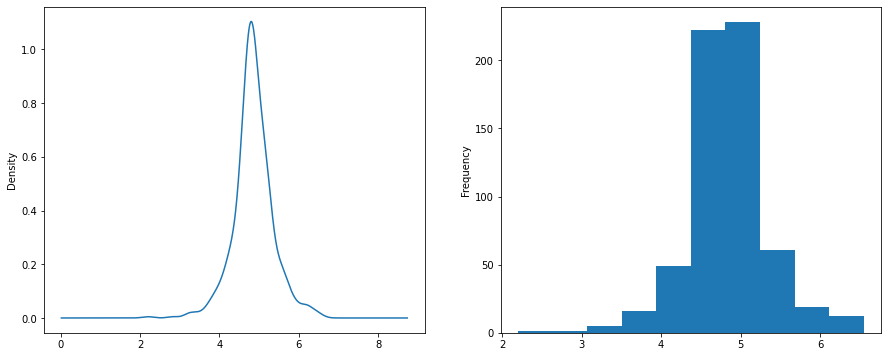

In [105]:
train['Amount_log']=np.log(train['LoanAmount'])
plt.figure(1)
plt.subplot(121)
train['Amount_log'].plot(kind='kde',figsize=(8,6))
plt.subplot(122)
train['Amount_log'].plot(kind='hist',figsize=(15,6))
plt.show()

Applying Log Techinique to get data normally distributed on test data

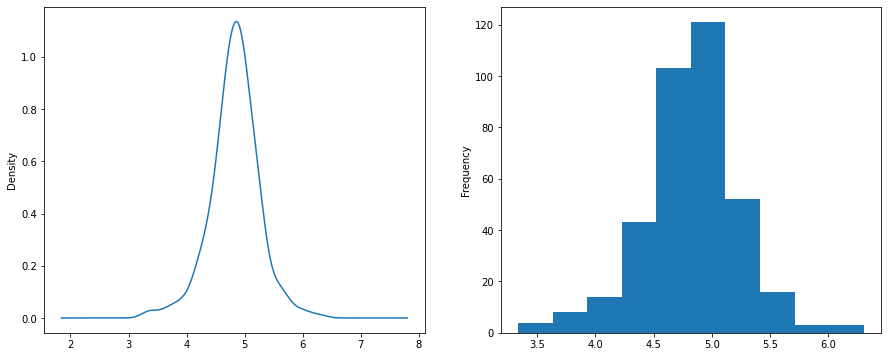

In [106]:
test['Amount_log']=np.log(test['LoanAmount'])
plt.figure(1)
plt.subplot(121)
test['Amount_log'].plot(kind='kde',figsize=(8,6))
plt.subplot(122)
test['Amount_log'].plot(kind='hist',figsize=(15,6))
plt.show()

In [135]:
test.shape

(367, 21)

In [136]:
train.shape

(614, 22)

Here the distribution look normally distributed.Hence all the extrem value are remove

In [110]:
train=train.drop('Loan_ID',axis=1)
test=test.drop('Loan_ID',axis=1)

In [111]:
X=train.drop('Loan_Status',1)
y=train.Loan_Status

In [112]:
X=pd.get_dummies(X)

In [113]:
train=pd.get_dummies(train)
test=pd.get_dummies(test)

#Train Test Split

In [167]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
from sklearn.linear_model import LogisticRegression
Logreg=LogisticRegression()
Logreg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Using Logistics Regression for model building

In [168]:
from sklearn.metrics import accuracy_score
y_pred=Logreg.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.827027027027027


In [159]:
pred_test=Logreg.predict(test)

# Here i got my accuracy on test dataset as well 0.81

#File Sumbission 

Converting the sumbission into csv.

In [169]:
sumbission=pd.read_csv("sample_submission_49d68Cx.csv")

In [161]:
sumbission.columns

Index(['Loan_ID', 'Loan_Status'], dtype='object')

In [170]:
pred_test.shape

(367,)

In [121]:
test.shape

(367, 21)

In [122]:
sumbission.shape

(367, 2)

In [171]:
sumbission['Loan_Status']=pred_test
sumbission['Loan_ID']=test_orignal['Loan_ID']

In [172]:
sumbission['Loan_Status'].replace(0,'N',inplace=True)
sumbission['Loan_Status'].replace(1,'Y',inplace=True)

In [221]:
pd.DataFrame(sumbission,columns=['Loan_ID','Loan_Status']).to_csv('sample_sumbission.csv',index=False)